In [10]:
#data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

#visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#machine learning 
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [11]:
#Acquire data
#The Python Pandas packages helps us work with our datasets.
#We start by acquiring the training and testing datasets into Pandas DataFrames.
#We also combine these datasets to run certain operations on both datasets together.

train_df = pd.read_csv('../data/train.csv')
test_df = pd.read_csv('../data/test.csv')
combine = [train_df, test_df]

In [12]:
#Analyze by describing data
#Pandas also helps describe the datasets answering following questions early in our project.
#'Which features are available in the dataset?'
#Noting the feature names for directly manipulating or analyzing these.

print(train_df.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


In [13]:
#Categorical : Survived, Sex, and Embarked
#Ordinal : Pclass
#Continous : Age, Fare
#Discrete : SibSp, Parch

#preview the data
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [14]:
#Numerical, alphanumeric data within same feature.
#These are candidates for correcting goal.
#Ticket is a mix of numeric and alphanumeric data types.
#Cabin is alphanumeric

#Name feature may contain errors or typos as there are several ways used to describe a name
#including titles, round brackets, and quotes used for alternative or short names.

train_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [15]:
#Cabin > Age > Embarked features contain a number of null values in that order for the training dataset.
#Cabin > Age are incomplete in case of test dataset.

#Seven features are integer or floats.
#Five features are strings(object).

train_df.info()
print('-'*40)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Passenger

In [16]:
#What is the distribution of numerical feature values across the samples?

#Total samples are 891 of 40% of the actual number of passengers on board the Titanic(2,224).
#Survived is a categorical feature with 0 or 1 values.
#Around 38% samples survived representative of the actual survival rate at 32%.
#Most passengers (>75%) did not travel with parents or children.
#Nearly 30% of the passengers had siblings and/or spouse aboard.
#Fares varied significantly with few passengers(<1%) paying as high as $512.
#Few elderly passengers(<1%) within age range 65-80.

train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [19]:
#What is the distribution of categorical features?
#Names are unique across the dataset(count = unique = 891)
#Sex variable as two possible values with 65% male(top = male, freq = 577/count = 891)
#Cabin values have several dupicates across samples. Alternatively several passengers shared a cabin.
#Embarked takes three possible values. S port used by most passengers. (top = S)
#Ticket feature has high ratio(22%) of duplicated values. (unique = 681).

train_df.describe(include=['O'])


,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Gilinski, Mr. Eliezer",male,347082,G6,S
freq,1,577,7,4,644


In [ ]:
#Correlating.
#We want to know how well does each feature correlate with Survival. We want to do this early in our project and match these quick correlations with modelled correlations later in the project.

#Completing.
#We may want to complete Age feature as it is definitely correlated to survival.
#We may want to complete the Embarked feature as it may also correlate with survival or another important feature.

#Correcting.
#Ticket feature may be dropped from our analysis as it contains high ratio of duplicates (22%) and there may not be a correlation between Ticket and survival.
#Cabin feature may be dropped as it is highly incomplete or contains many null values both in training and test dataset.
#PassengerId may be dropped from training dataset as it does not contribute to survival.
#Name feature is relatively non-standard, may not contribute directly to survival, so maybe dropped.

#Creating.
#We may want to create a new feature called Family based on Parch and SibSp to get total count of family members on board.
#We may want to engineer the Name feature to extract Title as a new feature.
#We may want to create new feature for Age bands. This turns a continous numerical feature into an ordinal categorical feature.
#We may also want to create a Fare range feature if it helps our analysis.

#Classifying.
#We may also add to our assumptions based on the problem description noted earlier.
#Women (Sex=female) were more likely to have survived.
#Children (Age<?) were more likely to have survived.
#The upper-class passengers (Pclass=1) were more likely to have survived.

In [22]:
#Analyze by pivoting features
#To confirm some of our observations and assumptions, we can quickly analyze our feature correlations by pivoting features against each other. We can only do so at this stage for features which do not have any empty values. It also makes sense doing so only for features which are categorical (Sex), ordinal (Pclass) or discrete (SibSp, Parch) type.

#Pclass We observe significant correlation (>0.5) among Pclass=1 and Survived (classifying #3). We decide to include this feature in our model.
#Sex We confirm the observation during problem definition that Sex=female had very high survival rate at 74% (classifying #1).
#SibSp and Parch These features have zero correlation for certain values. It may be best to derive a feature or a set of features from these individual features (creating #1).



In [23]:
train_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [24]:
train_df[['Sex', 'Survived']].groupby(['Sex'], as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [25]:
train_df[['SibSp', 'Survived']].groupby(['SibSp'], as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [27]:
train_df[['Parch', 'Survived']].groupby(['Parch'], as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


In [ ]:
#Correlating numerical features
#Let us start by understanding correlations between numerical features and our solution goal (Survived).
#A histogram chart is useful for analyzing continous numerical variables like Age where banding or ranges will help identify useful patterns. The histogram can indicate distribution of samples using automatically defined bins or equally ranged bands. This helps us answer questions relating to specific bands (Did infants have better survival rate?)
#Note that x-axis in historgram visualizations represents the count of samples or passengers.

#Observations.
#Infants (Age <=4) had high survival rate.
#Oldest passengers (Age = 80) survived.
#Large number of 15-25 year olds did not survive.
#Most passengers are in 15-35 age range.

#Decisions.
#This simple analysis confirms our assumptions as decisions for subsequent workflow stages.
#We should consider Age (our assumption classifying #2) in our model training.
#Complete the Age feature for null values (completing #1).
#We should band age groups (creating #3).

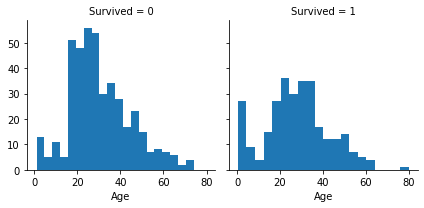

In [30]:
g = sns.FacetGrid(train_df, col = 'Survived')
g.map(plt.hist, 'Age', bins = 20)

In [ ]:
#Correlating numerical and ordinal features
#We can combine multiple features for identifying correlations using a single plot. This can be done with numerical and categorical features which have numeric values.

#Observations.
#Pclass=3 had most passengers, however most did not survive. Confirms our classifying assumption #2.
#Infant passengers in Pclass=2 and Pclass=3 mostly survived. Further qualifies our classifying assumption #2.
#Most passengers in Pclass=1 survived. Confirms our classifying assumption #3.
#Pclass varies in terms of Age distribution of passengers.

#Decisions.
#Consider Pclass for model training.

/Users/useonsong/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


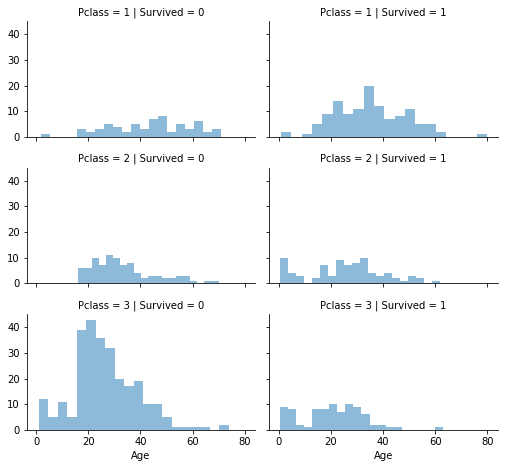

In [31]:
#grid = sns.FacetGrid(train_df, col = 'Pclass', hue = 'Survived')

grid = sns.FacetGrid(train_df, col = 'Survived', row = 'Pclass', size = 2.2, aspect = 1.6)
grid.map(plt.hist, 'Age', alpha = .5, bins = 20)
grid.add_legend();

In [ ]:
#Correlating categorical features
#Now we can correlate categorical features with our solution goal.

#Observations.
#Female passengers had much better survival rate than males. Confirms classifying (#1).
#Exception in Embarked=C where males had higher survival rate. This could be a correlation between Pclass and Embarked and in turn Pclass and Survived, not necessarily direct correlation between Embarked and Survived.
#Males had better survival rate in Pclass=3 when compared with Pclass=2 for C and Q ports. Completing (#2).
#Ports of embarkation have varying survival rates for Pclass=3 and among male passengers. Correlating (#1).

#Decisions.
#Add Sex feature to model training.
#Complete and add Embarked feature to model training.

/Users/useonsong/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:728: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/Users/useonsong/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:733: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


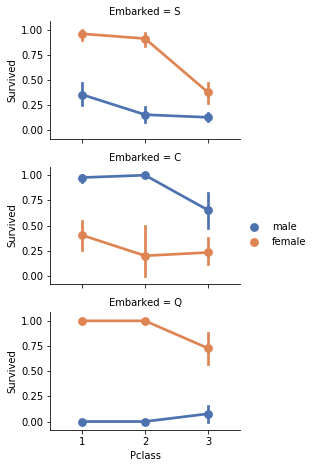

In [34]:
#grid = sns.FacetGrid(train_df, col = 'Embarked')

grid = sns.FacetGrid(train_df, row = 'Embarked', size = 2.2, aspect = 1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette = 'deep')
grid.add_legend()

In [ ]:
#Correlating categorical and numerical features
#We may also want to correlate categorical features (with non-numeric values) and numeric features. We can consider correlating Embarked (Categorical non-numeric), Sex (Categorical non-numeric), Fare (Numeric continuous), with Survived (Categorical numeric).

#Observations.
#Higher fare paying passengers had better survival. Confirms our assumption for creating (#4) fare ranges.
#Port of embarkation correlates with survival rates. Confirms correlating (#1) and completing (#2).

#Decisions.
#Consider banding Fare feature.

/Users/useonsong/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/Users/useonsong/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:728: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


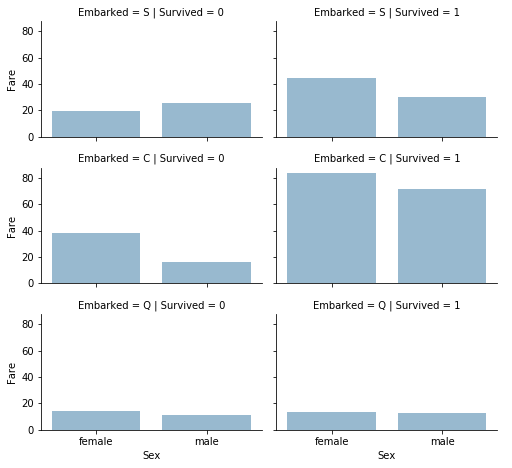

In [35]:
#grid = sns.FacetGrid(train_df, col = 'Embarked', hue = 'Survived', palette = {0: 'k', 1: 'w'})
grid = sns.FacetGrid(train_df, row = 'Embarked', col = 'Survived', size = 2.2, aspect = 1.6)
grid.map(sns.barplot, 'Sex', 'Fare', alpha = .5, ci = None)
grid.add_legend()

In [ ]:
#Wrangle data
#We have collected several assumptions and decisions regarding our datasets and solution requirements. So far we did not have to change a single feature or value to arrive at these. Let us now execute our decisions and assumptions for correcting, creating, and completing goals.

#Correcting by dropping features
#This is a good starting goal to execute. By dropping features we are dealing with fewer data points. Speeds up our notebook and eases the analysis.
#Based on our assumptions and decisions we want to drop the Cabin (correcting #2) and Ticket (correcting #1) features.
#Note that where applicable we perform operations on both training and testing datasets together to stay consistent.

In [45]:
print('Before', train_df.shape, test_df.shape, combine[0].shape, combine[1].shape)


test_df = test_df.drop(['Ticket', 'Cabin'], axis=1)
combine = [train_df, test_df]

'After', train_df.shape, test_df.shape, combine[0].shape, combine[1].shape

Before (891, 10) (418, 11) (891, 12) (418, 11)


('After', (891, 10), (418, 9), (891, 10), (418, 9))

In [ ]:
#Creating new feature extracting from existing
#We want to analyze if Name feature can be engineered to extract titles and test correlation between titles and survival, before dropping Name and PassengerId features.
#In the following code we extract Title feature using regular expressions. 
#The RegEx pattern (\w+\.) matches the first word which ends with a dot character within Name feature. The expand=False flag returns a DataFrame.

#Observations.
#When we plot Title, Age, and Survived, we note the following observations.
#Most titles band Age groups accurately. For example: Master title has Age mean of 5 years.
#Survival among Title Age bands varies slightly.
#Certain titles mostly survived (Mme, Lady, Sir) or did not (Don, Rev, Jonkheer).

#Decision.
#We decide to retain the new Title feature for model training.

In [47]:
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand = False)
pd.crosstab(train_df['Title'], train_df['Sex'])                                                

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [48]:
#We can replace many titles with a more common name or classify them as Rare.

for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess', 'Capt', 'Col',\
                                                 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    dataset['Title'] = dataset['Title'].replace('MIle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
train_df[['Title', 'Survived']].groupby(['Title'], as_index = False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.699454
2,Mlle,1.000000
3,Mr,0.156673
4,Mrs,0.793651
5,Rare,0.347826


In [49]:
#We can convert the categorical titles to ordinal.

title_mapping = {'Mr' : 1, 'Miss' : 2, 'Mrs' : 3, 'Master' : 4, 'Rare' : 5}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] =dataset['Title'].fillna(0)
    
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,3.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,2.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,3.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1.0
